<a href="https://colab.research.google.com/github/kiranahire03/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project 4**

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features


# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## **Loading Dataset and Importing Libraries**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
netflix_df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING - Kiran Ahire/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

## **Descriptive Analysis**

In [3]:
#first five rows
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
#last 5 rows
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [5]:
#Getting number of rows and column of the dataset
netflix_df.shape

(7787, 12)


*   **Dataset has 7787 rows and 12 Columns.**




In [6]:
# Getting Columns name
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
# Information about the dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
#finding unique values
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## **Data Preprocessing**

### **Duplicate values**

In [9]:
# Checking Duplicate Values
duplicate = len(netflix_df[netflix_df.duplicated()])
print("Duplicate values in the data set is = ",duplicate)

Duplicate values in the data set is =  0


*  **From the above we can see as there are no Duplicate values as well.**

### **Missing values**

In [10]:
#Checking for the missing values
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

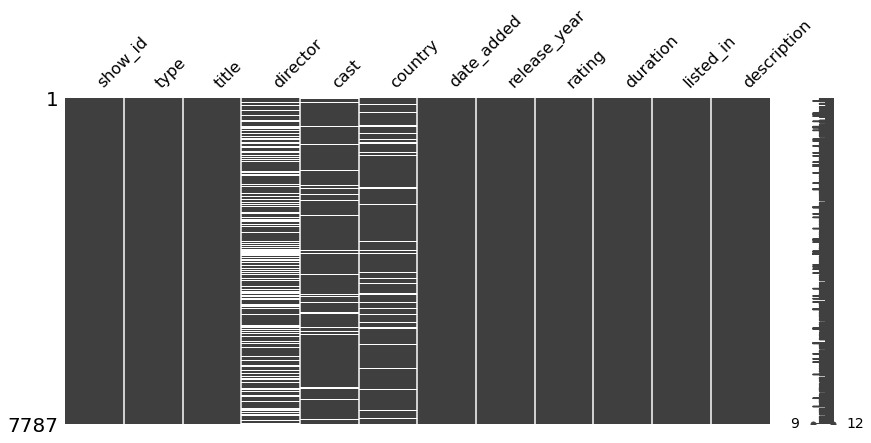

In [11]:
#Checking for any missing values 
msno.matrix(netflix_df,figsize = (14,6),labels = None)

*   **From the above plot we can say that there are missing values in 'Director', 'Country' ,'Cast' columns in our dataset.**

### **NULL VALUE TREATMENT**

1. **RATING & COUNTRY** - As rating column has 0.08% null values , so replacing nulls with mose frequent TV-MA rating and doing same thing with country column

2. **CAST** - cast column has too many different values and more than 9% are missing, so there is no need to keep it but we are keeping it to perform EDA

3. **DATE** - there are few missing values for date column. so, lets drop missing value rows.

4. **DIRECTOR** - Director column has more then 30% null values so dropping that column

In [12]:
netflix_df['rating'].replace(np.nan, 'TV-MA',inplace  = True)
netflix_df['country'].replace(np.nan, 'United States',inplace  = True)
netflix_df['cast'].replace(np.nan, 'missing info',inplace  = True)

netflix_df= netflix_df.drop(columns='director',axis=1)

In [13]:
netflix_df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [14]:
netflix_df = netflix_df[netflix_df['date_added'].notna()]

In [15]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [16]:
# add new features
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

In [17]:
netflix_df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


# **Exploratory Data Analysis**

## **1. Type**

In [18]:
netflix_df['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

Netflix dataset consisting of both movies and shows. Let’s compare the total number of movies and shows in this dataset to know which one is the majority.


In [19]:
# ploting for pie chart on type feature
# import plotly.express as px
x = netflix_df['type'].value_counts().reset_index()
colors=['DodgerBlue','PaleTurquoise']
fig = px.pie(x,title='Type of Netflix Content',values='type',names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
              marker=dict(colors=colors, line=dict(color='#000000', width=2)))

**Conclusion :**

* **It is evident that there are more movies on Netflix than TV shows so we can say that Netflix is more focusing on Movies than TV shows.**
* **Netflix has 5377 movies, which is more than double the quantity of TV shows.**
* **There are about 70% movies and 30% TV shows on Netflix.**



## **2. Release Year**

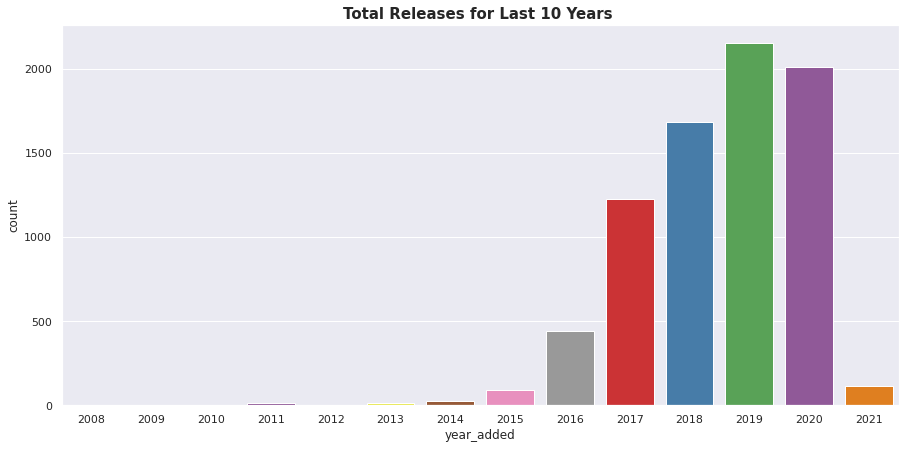

In [20]:
# Total release for last 10 years
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x='year_added',data=netflix_df,palette="Set1")

plt.title('Total Releases for Last 10 Years ',size='15',fontweight="bold")    
plt.show()

**Conclusion : The number of release have significantly increased after 2015 and have dropped in 2021**

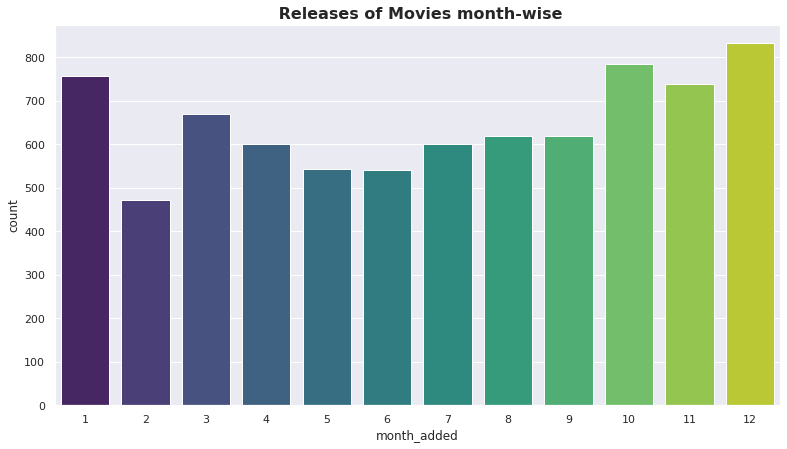

In [21]:
# Release of movies month-wise
sns.set(rc={'figure.figsize':(13,7)})
sns.countplot(x='month_added',data=netflix_df,palette="viridis")

plt.title(' Releases of Movies month-wise',size='16',fontweight="bold")    
plt.show()

**More of the content is released in holiday season - October, November, December and January**

## **3. Rating**

In [22]:
netflix_df['rating']

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7777, dtype: object

In [23]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_df['target_ages'] = netflix_df['rating'].replace(ratings)

In [24]:
# type should be a catego
netflix_df['type'] = pd.Categorical(netflix_df['type'])
netflix_df['target_ages'] = pd.Categorical(netflix_df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [25]:
netflix_df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,Adults
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Adults
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,Adults
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,Teens
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,Teens


In [26]:
#creating two extra columns
tv_shows=netflix_df[netflix_df['type']=='TV Show']
movies=netflix_df[netflix_df['type']=='Movie']

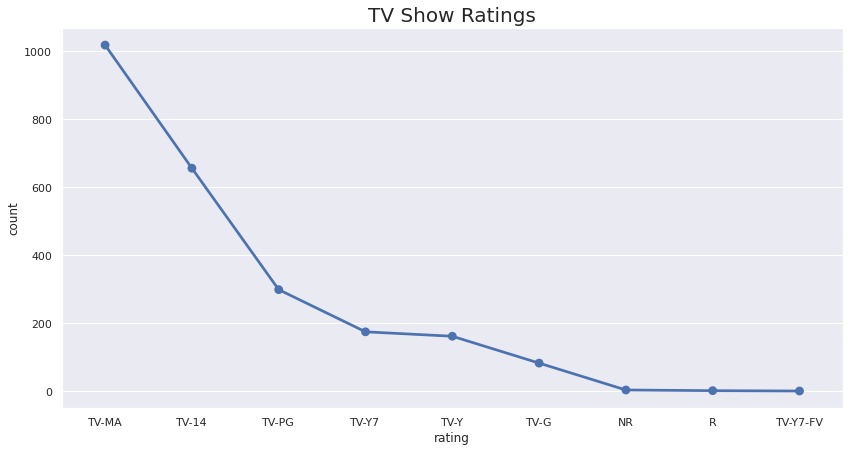

In [27]:
#Rating based on rating system of all TV Shows
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()

**Conclusion : TV-MA has the highest number of ratings for tv shows i,e adult ratings**

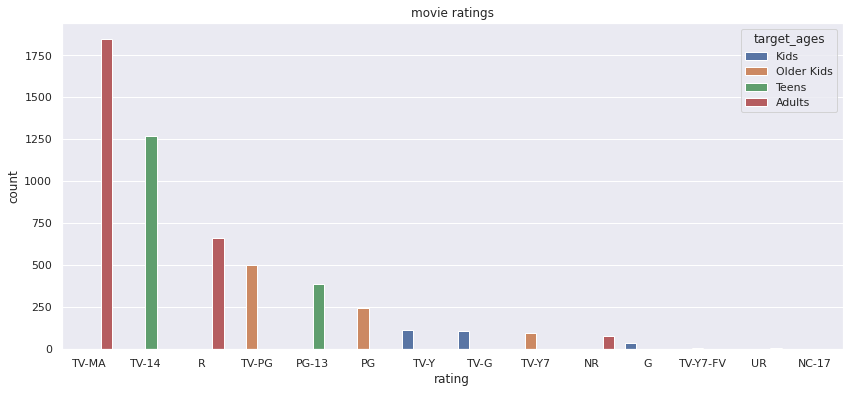

In [28]:
#Movie Ratings based on Target Age Groups
plt.figure(figsize=(14,6))
plt.title('movie ratings')
sns.countplot(x=movies['rating'],hue=movies['target_ages'],data=movies,order=movies['rating'].value_counts().index)

**Conclusion : TV-MA has the highest number of ratings. For both tv shows and adult ratings in both the cases TV-MA has the highest number of ratings.**

## **4. Country**

In [29]:
#Countries having highest number of contents
country = netflix_df['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]

fig = px.pie(country, values='country', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'darkred', width = 2)))
fig.show()

**Conclusion : USA has the highest number of content on the netflix ,followed by india**

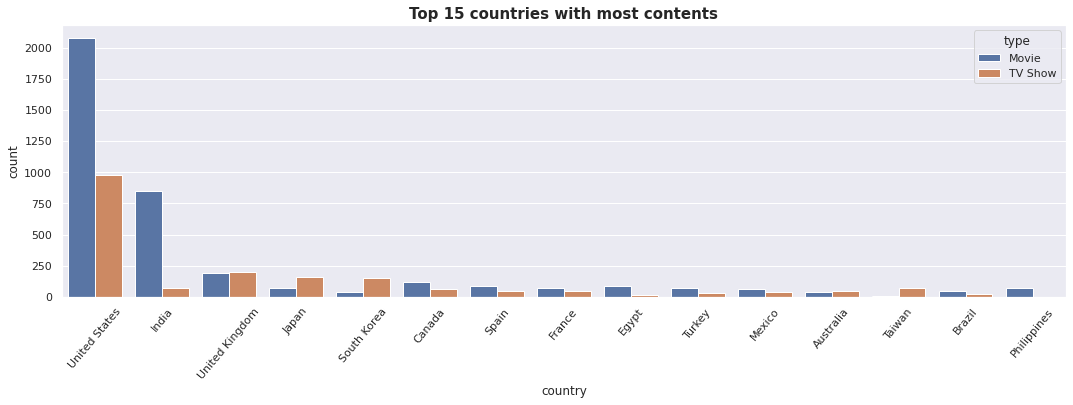

In [30]:
#Analysing top15 countries with most content 
plt.figure(figsize=(18,5))
sns.countplot(x=netflix_df['country'],order=netflix_df['country'].value_counts().index[0:15],hue=netflix_df['type'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

**Conclusion : USA has highest number of content with high number of movies than TV shows.**

## **5. Genre**

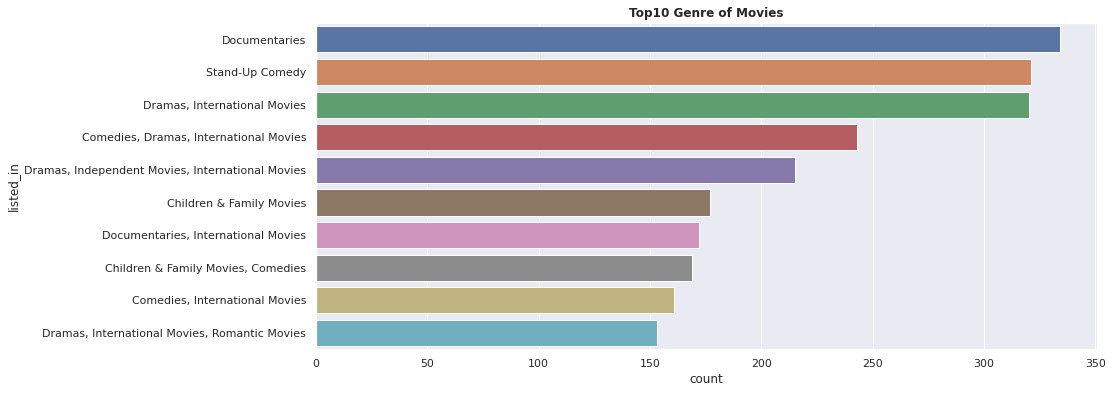

In [31]:
#Analysing top10 genre of the movies
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10])

**Conclusion : Documentaries are the top most genre in netflix followed by standup comedy and Drams and international movies**

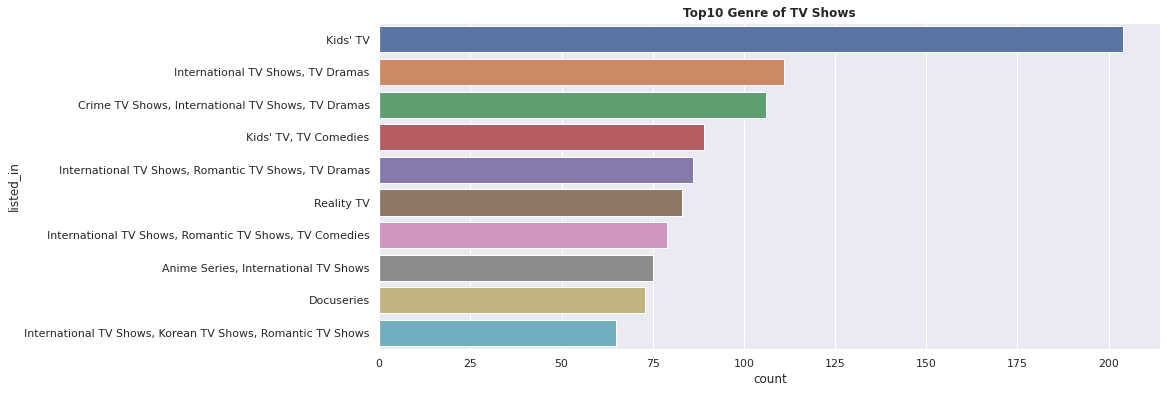

In [32]:
#Analysing top10 genres of TVSHOWS
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of TV Shows',fontweight="bold")
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10])

**Conclusion : kids tv is the top most  TV show genre in netflix.**

## **6. Cast**

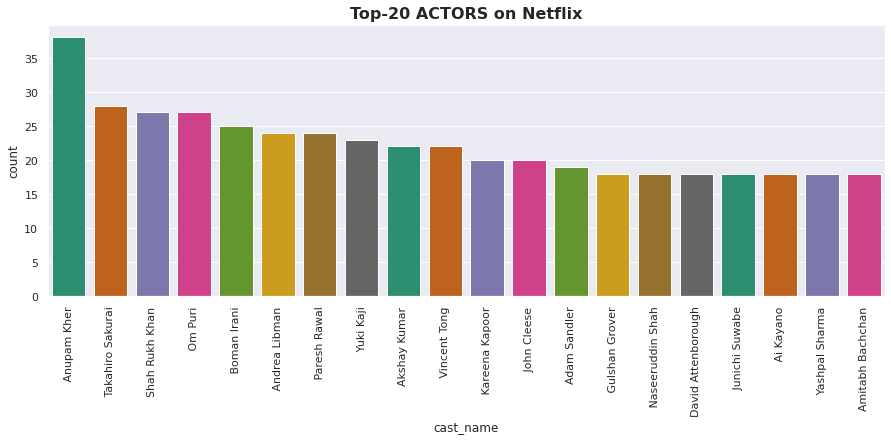

In [33]:
# Top 20 actors netflix
netflix_df['cast_name'] = netflix_df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in netflix_df['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

**Conclusion : The top actor on Netflix Movies, based on the number of titles, is Anupam Kher.**

## **7. Duration**

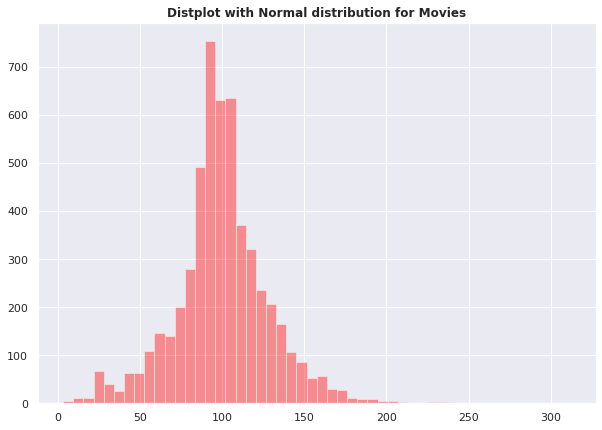

In [34]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(movies['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

**Conclusion : Most of the movies have duration of between 50 to 150.**

## **Understanding what type content is available in different countries**

In [35]:
# Preparing data for heatmap
netflix_df['count'] = 1
data = netflix_df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = netflix_df.loc[netflix_df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.180791,0.000000,0.095652,0.016251,0.008889,0.02,0.027322,0.022388,0.093434,0.089362
Older Kids,0.225989,0.039604,0.060870,0.160347,0.271111,0.07,0.120219,0.044776,0.204545,0.195090
Teens,0.146893,0.683168,0.165217,0.567714,0.351111,0.14,0.382514,0.097015,0.189394,0.242881
Adults,0.446328,0.277228,0.678261,0.255688,0.368889,0.77,0.469945,0.835821,0.512626,0.472668


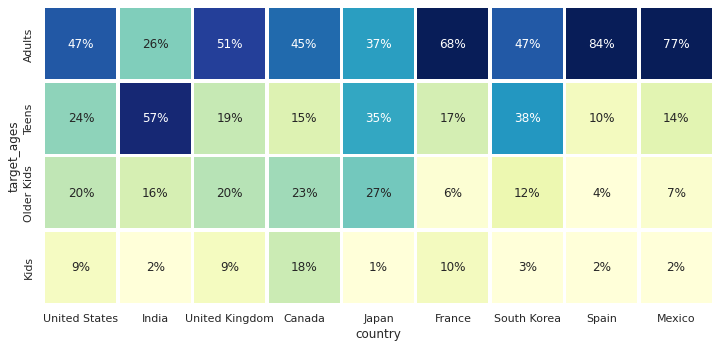

In [36]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

**Conclusion:**

*   **USA and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan!**

*   **Mexico and Spain have similar content on Netflix for different age groups.** 



# **Data Cleaning and Feature Engineering**

## **1. Description**

In [37]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'target_ages', 'cast_name', 'count'],
      dtype='object')

In [38]:
netflix_df.drop(['target_ages', 'cast_name', 'count','cast'],axis=1, inplace=True)
netflix_df.head(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12


In [39]:
netflix_df.description.iloc[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [40]:
First_des = netflix_df.description.iloc[0]
First_des

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

###  **Importing necessary libraries**

In [41]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

* **Download nltk**

In [42]:
import nltk 
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True


###   **Removing stopwords**



In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [44]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')

i,  me,  my,  myself,  we,  our,  ours,  ourselves,  you,  you're,  you've,  you'll,  you'd,  your,  yours,  yourself,  yourselves,  he,  him,  his,  himself,  she,  she's,  her,  hers,  herself,  it,  it's,  its,  itself,  they,  them,  their,  theirs,  themselves,  what,  which,  who,  whom,  this,  that,  that'll,  these,  those,  am,  is,  are,  was,  were,  be,  been,  being,  have,  has,  had,  having,  do,  does,  did,  doing,  a,  an,  the,  and,  but,  if,  or,  because,  as,  until,  while,  of,  at,  by,  for,  with,  about,  against,  between,  into,  through,  during,  before,  after,  above,  below,  to,  from,  up,  down,  in,  out,  on,  off,  over,  under,  again,  further,  then,  once,  here,  there,  when,  where,  why,  how,  all,  any,  both,  each,  few,  more,  most,  other,  some,  such,  no,  nor,  not,  only,  own,  same,  so,  than,  too,  very,  s,  t,  can,  will,  just,  don,  don't,  should,  should've,  now,  d,  ll,  m,  o,  re,  ve,  y,  ain,  aren,  

In [45]:
print("Number of stopwords in english : ", len(sw))

Number of stopwords in english :  179


In [46]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [47]:
netflix_df['description'] = netflix_df['description'].apply( remove_stopwords )
netflix_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,2020,8
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies","devastating earthquake hits mexico city, trapp...",2016,12
2,s3,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","army recruit found dead, fellow soldiers force...",2018,12
3,s4,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","postapocalyptic world, rag-doll robots hide fe...",2017,11
4,s5,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,brilliant group students become card-counting ...,2020,1


**Now all the values of description are punctutation and stopword free.**

### **CountVectorizer() to count vocabulary items**

In [48]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(netflix_df['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [51]:
dictionary

dict_items([('future', 6579), ('elite', 5220), ('inhabit', 8198), ('island', 8464), ('paradise', 11629), ('far', 5902), ('crowded', 3877), ('slums', 14843), ('get', 6769), ('one', 11277), ('chance', 2786), ('join', 8656), ('saved', 14029), ('squalor', 15231), ('devastating', 4450), ('earthquake', 5078), ('hits', 7603), ('mexico', 10201), ('city', 3037), ('trapped', 16558), ('survivors', 15745), ('walks', 17461), ('life', 9350), ('wait', 17440), ('rescued', 13377), ('trying', 16691), ('desperately', 4403), ('stay', 15335), ('alive', 665), ('army', 1058), ('recruit', 13104), ('found', 6392), ('dead', 4127), ('fellow', 6005), ('soldiers', 14962), ('forced', 6333), ('confront', 3455), ('terrifying', 16110), ('secret', 14212), ('that', 16161), ('haunting', 7358), ('jungle', 8744), ('training', 16516), ('camp', 2495), ('postapocalyptic', 12275), ('world', 17854), ('rag', 12841), ('doll', 4793), ('robots', 13697), ('hide', 7522), ('fear', 5961), ('dangerous', 4058), ('machines', 9660), ('exte

In [52]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

Creating a new *DataFrame* **vocab_before_stemming**

In [53]:
# Store the count in panadas dataframe with vocab as index
vocab_before_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)

In [54]:
vocab_before_stemming.head(4)

,Word,count
17475,şeref,18122
9914,ōarai,18121
11710,łukasz,18120
10570,über,18119


In [55]:
vocab_before_stemming.head(20).T

,17475,9914,11710,10570,12513,6378,16885,9947,9427,18093,6333,18120,15312,6952,17068,18111,18117,9823,16773,14452
Word,şeref,ōarai,łukasz,über,ömer,émile,ángel,álvaro,álex,zé,zurich,zumbo,zulu,zuhu,zuckerberg,zoé,zozo,zoya,zorro,zordon
count,18122,18121,18120,18119,18118,18117,18116,18115,18114,18113,18112,18111,18110,18109,18108,18107,18106,18105,18104,18103


In [56]:
vocab_before_stemming.tail(4)

,Word,count
1013,10,3
7670,009,2
6647,007,1
1014,000,0


### **Top 10 most occured word**

In [75]:
top10_most_ocurred_vacab = vocab_before_stemming.head(10)

In [76]:
top10_most_occurred_words = top10_most_ocurred_vacab.Word.values 
top10_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'über', 'ömer', 'émile', 'ángel',
       'álvaro', 'álex', 'zé'], dtype=object)

In [77]:
top10_most_occurred_words_count = top10_most_ocurred_vacab['count'].values 
top10_most_occurred_words_count

array([18122, 18121, 18120, 18119, 18118, 18117, 18116, 18115, 18114,
       18113])

<BarContainer object of 10 artists>

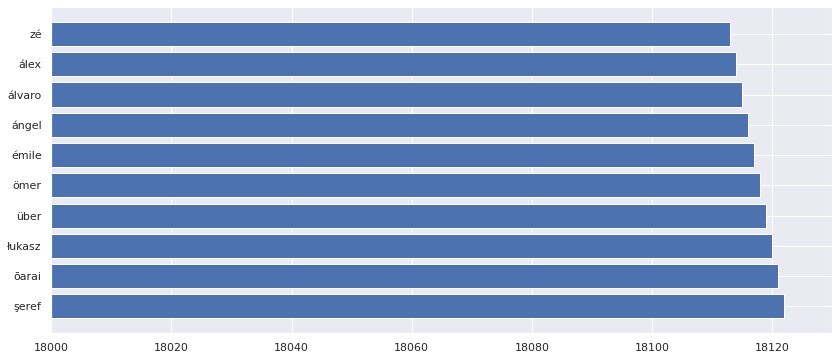

In [78]:
plt.figure( figsize = ( 14,6 ))
plt.xlim(18000, 18130)
plt.barh(top10_most_occurred_words , top10_most_occurred_words_count )


### **SnowballStemmer( 'english' )**

In [79]:
# Create an object of stemming function
stemmer = SnowballStemmer("english")

In [80]:
def Apply_stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [82]:
#Stemming for description
netflix_df['description'] = netflix_df['description'].apply( Apply_stemming )
netflix_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,2020,8
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies","devast earthquak hit mexico city, trap survivo...",2016,12
2,s3,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","armi recruit found dead, fellow soldier forc c...",2018,12
3,s4,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","postapocalypt world, rag-dol robot hide fear d...",2017,11
4,s5,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,brilliant group student becom card-count exper...,2020,1


### **Using TfidfVectorizer(after stemming)**

In [84]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(netflix_df['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [85]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

Creating a new *DataFrame* **vocab_after_stemming**

In [86]:
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

In [87]:
top10_most_ocurred_vocab = vocab_after_stemming.head(10)

In [88]:
top10_most_occurred_words = top10_most_ocurred_vocab.Word.values 
top10_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'über', 'ömer', 'émile', 'ángel',
       'álvaro', 'álex', 'zé'], dtype=object)

In [89]:
top10_most_occurred_words_count = top10_most_ocurred_vocab['count'].values 
top10_most_occurred_words_count

array([15651, 15650, 15649, 15648, 15647, 15646, 15645, 15644, 15643,
       15642])

<BarContainer object of 10 artists>

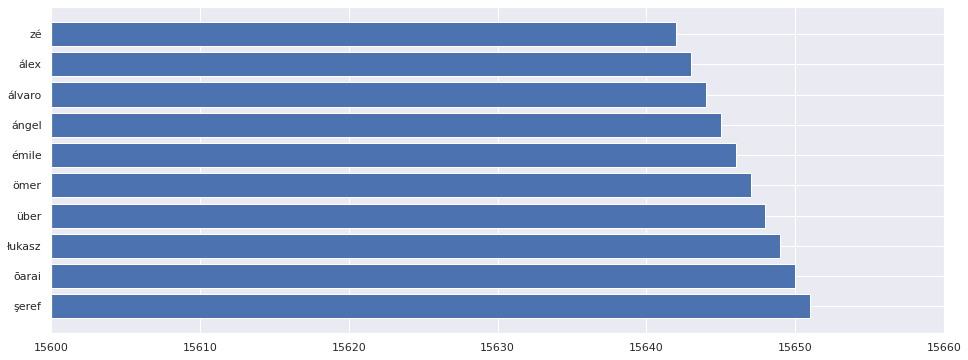

In [93]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(15600, 15660)
plt.barh(top10_most_occurred_words , top10_most_occurred_words_count )

Adding a new column **length** which will contain length of description

In [94]:
netflix_df['Length(description)'] = netflix_df['description'].apply(lambda x: len(x))

In [95]:
netflix_df.head(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,Length(description)
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,2020,8,86
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies","devast earthquak hit mexico city, trap survivo...",2016,12,91
2,s3,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","armi recruit found dead, fellow soldier forc c...",2018,12,104


In [97]:
netflix_df.description.iloc[0]

'futur elit inhabit island paradis far crowd slums, get one chanc join 3% save squalor.'

In [98]:
len(netflix_df.description.iloc[0])

86